___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

np.set_printoptions(suppress=True)

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [90]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  stratify=y_train,
                                                  test_size=0.1,
                                                  random_state=42)

In [91]:
print(f"There are {len(x_train)} images in the training dataset")
print(f"There are {len(x_test)} images in the test dataset")
print(f"There are {len(x_val)} images in the test dataset")

There are 54000 images in the training dataset
There are 10000 images in the test dataset
There are 6000 images in the test dataset


In [75]:
x_train[67].shape

(28, 28)

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [76]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

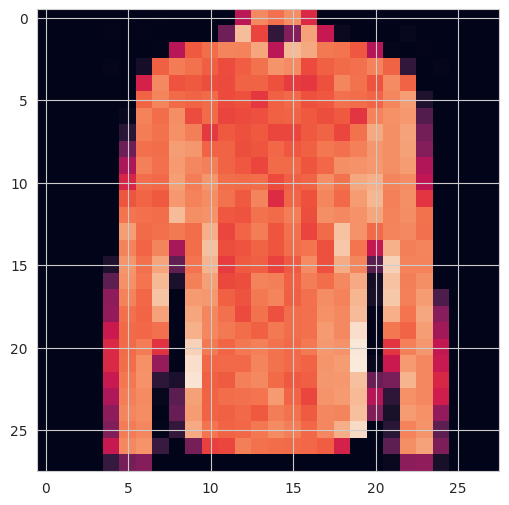

In [77]:
plt.imshow(x_train[67])

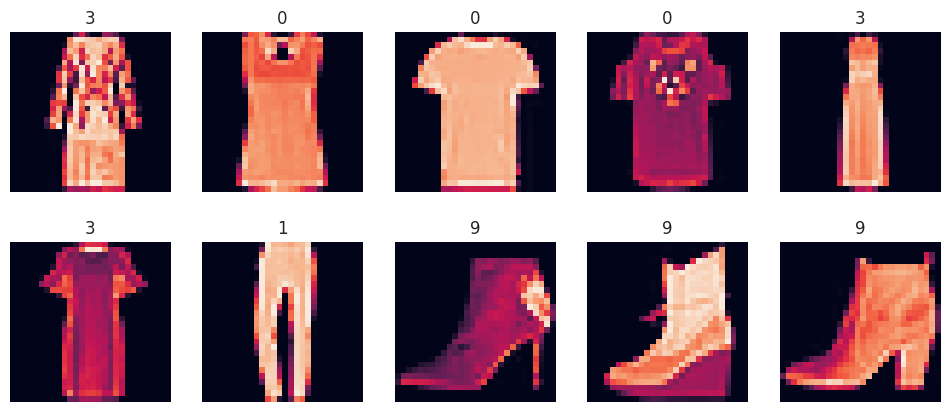

In [78]:
f, axes = plt.subplots(2, 5, figsize=(12, 5))

for ax in axes.ravel():
    idx = np.random.randint(0, len(x_train))
    ax.axis("off")
    ax.set_title(y_train[idx])
    ax.imshow(x_train[idx])
plt.show()

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [92]:
x_train[342].min()

0

In [93]:
x_train[9].max()

255

In [94]:
# Normalize image pixels
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_val = x_val.astype("float32")
x_train /= 255
x_test /= 255
x_val /= 255

In [95]:
x_train[342].min()

0.0

In [96]:
x_train[9].max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [97]:
x_train.shape, x_test.shape, x_val.shape

((54000, 28, 28), (10000, 28, 28), (6000, 28, 28))

In [98]:
x_train = np.expand_dims(x_train, 3)
x_test = np.expand_dims(x_test, 3)
x_val = np.expand_dims(x_val, 3)

In [99]:
x_train.shape, x_test.shape,x_val.shape

((54000, 28, 28, 1), (10000, 28, 28, 1), (6000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [100]:
from tensorflow.keras.utils import to_categorical

In [101]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_val = to_categorical(y_val, 10)

In [102]:
Y_train.shape

(54000, 10)

In [103]:
y_train[9]

8

In [104]:
Y_train[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [105]:
y_val[9]

4

In [106]:
Y_val[9]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [107]:
y_test[9]

7

In [108]:
Y_test[9]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [160]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import Dropout
model = Sequential()

model.add(
    Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu")
)

model.add(MaxPool2D(pool_size=(2, 2))) #  default strides=(1,1)

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))


model.add(Dense(10, activation="softmax"))

opt = RMSprop(lr=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=[ "Accuracy"])

In [161]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 28)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 4732)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                      

##  Model Training

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [162]:
from tensorflow.keras.callbacks import EarlyStopping


In [163]:
early_stop = EarlyStopping(
    monitor="val_accuracy", mode="max", patience=4, restore_best_weights=True
)

In [164]:
model.fit(
    x_train,
    Y_train,
    batch_size=32,
    epochs=60,
    validation_data=(x_val, Y_val),
    callbacks=[early_stop],
)

Epoch 1/60
1688/1688 [==============================] - ETA: 0s - loss: 0.5183 - Accuracy: 0.8212

1688/1688 [==============================] - 34s 20ms/step - loss: 0.5183 - Accuracy: 0.8212 - val_loss: 0.3321 - val_Accuracy: 0.8812
Epoch 2/60
1686/1688 [============================>.] - ETA: 0s - loss: 0.3622 - Accuracy: 0.8734

1688/1688 [==============================] - 34s 20ms/step - loss: 0.3621 - Accuracy: 0.8734 - val_loss: 0.3029 - val_Accuracy: 0.8885
Epoch 3/60
1687/1688 [============================>.] - ETA: 0s - loss: 0.3312 - Accuracy: 0.8836

1688/1688 [==============================] - 34s 20ms/step - loss: 0.3311 - Accuracy: 0.8836 - val_loss: 0.2745 - val_Accuracy: 0.9020
Epoch 4/60
1686/1688 [============================>.] - ETA: 0s - loss: 0.3146 - Accuracy: 0.8894

1688/1688 [==============================] - 33s 19ms/step - loss: 0.3146 - Accuracy: 0.8894 - val_loss: 0.2722 - val_Accuracy: 0.9012
Epoch 5/60
1686/1688 [============================>.] - ETA: 0s - loss: 0.3033 - Accuracy: 0.8953

1688/1688 [==============================] - 34s 20ms/step - loss: 0.3033 - Accuracy: 0.8953 - val_loss: 0.3213 - val_Accuracy: 0.8910
Epoch 6/60
1685/1688 [============================>.] - ETA: 0s - loss: 0.3013 - Accuracy: 0.8971

1688/1688 [==============================] - 32s 19ms/step - loss: 0.3014 - Accuracy: 0.8971 - val_loss: 0.2650 - val_Accuracy: 0.9050
Epoch 7/60
1686/1688 [============================>.] - ETA: 0s - loss: 0.2921 - Accuracy: 0.9005

1688/1688 [==============================] - 33s 20ms/step - loss: 0.2920 - Accuracy: 0.9005 - val_loss: 0.2605 - val_Accuracy: 0.9068
Epoch 8/60
1685/1688 [============================>.] - ETA: 0s - loss: 0.2876 - Accuracy: 0.9022

1688/1688 [==============================] - 32s 19ms/step - loss: 0.2880 - Accuracy: 0.9021 - val_loss: 0.2677 - val_Accuracy: 0.9090
Epoch 9/60
1686/1688 [============================>.] - ETA: 0s - loss: 0.2854 - Accuracy: 0.9019

1688/1688 [==============================] - 33s 20ms/step - loss: 0.2855 - Accuracy: 0.9019 - val_loss: 0.2566 - val_Accuracy: 0.9103
Epoch 10/60
1685/1688 [============================>.] - ETA: 0s - loss: 0.2826 - Accuracy: 0.9046

1688/1688 [==============================] - 32s 19ms/step - loss: 0.2825 - Accuracy: 0.9047 - val_loss: 0.2490 - val_Accuracy: 0.9143
Epoch 11/60
1687/1688 [============================>.] - ETA: 0s - loss: 0.2811 - Accuracy: 0.9049

1688/1688 [==============================] - 33s 20ms/step - loss: 0.2811 - Accuracy: 0.9049 - val_loss: 0.2585 - val_Accuracy: 0.9142
Epoch 12/60
1686/1688 [============================>.] - ETA: 0s - loss: 0.2752 - Accuracy: 0.9064

1688/1688 [==============================] - 32s 19ms/step - loss: 0.2751 - Accuracy: 0.9064 - val_loss: 0.2790 - val_Accuracy: 0.9055
Epoch 13/60
1687/1688 [============================>.] - ETA: 0s - loss: 0.2768 - Accuracy: 0.9055

1688/1688 [==============================] - 34s 20ms/step - loss: 0.2768 - Accuracy: 0.9055 - val_loss: 0.2634 - val_Accuracy: 0.9093
Epoch 14/60
1685/1688 [============================>.] - ETA: 0s - loss: 0.2733 - Accuracy: 0.9070

1688/1688 [==============================] - 32s 19ms/step - loss: 0.2734 - Accuracy: 0.9069 - val_loss: 0.2699 - val_Accuracy: 0.9093
Epoch 15/60
1687/1688 [============================>.] - ETA: 0s - loss: 0.2718 - Accuracy: 0.9083

1688/1688 [==============================] - 33s 20ms/step - loss: 0.2717 - Accuracy: 0.9083 - val_loss: 0.2597 - val_Accuracy: 0.9088
Epoch 16/60
1686/1688 [============================>.] - ETA: 0s - loss: 0.2702 - Accuracy: 0.9087

1688/1688 [==============================] - 32s 19ms/step - loss: 0.2702 - Accuracy: 0.9087 - val_loss: 0.2769 - val_Accuracy: 0.9140
Epoch 17/60
1685/1688 [============================>.] - ETA: 0s - loss: 0.2658 - Accuracy: 0.9092

1688/1688 [==============================] - 33s 20ms/step - loss: 0.2658 - Accuracy: 0.9092 - val_loss: 0.2718 - val_Accuracy: 0.9163
Epoch 18/60
1686/1688 [============================>.] - ETA: 0s - loss: 0.2653 - Accuracy: 0.9107

1688/1688 [==============================] - 32s 19ms/step - loss: 0.2655 - Accuracy: 0.9106 - val_loss: 0.2701 - val_Accuracy: 0.9068
Epoch 19/60
1686/1688 [============================>.] - ETA: 0s - loss: 0.2668 - Accuracy: 0.9092

1688/1688 [==============================] - 39s 23ms/step - loss: 0.2671 - Accuracy: 0.9091 - val_loss: 0.2749 - val_Accuracy: 0.9072
Epoch 20/60
1688/1688 [==============================] - ETA: 0s - loss: 0.2679 - Accuracy: 0.9099

1688/1688 [==============================] - 39s 23ms/step - loss: 0.2679 - Accuracy: 0.9099 - val_loss: 0.2771 - val_Accuracy: 0.9067
Epoch 21/60
1685/1688 [============================>.] - ETA: 0s - loss: 0.2636 - Accuracy: 0.9112

1688/1688 [==============================] - 34s 20ms/step - loss: 0.2635 - Accuracy: 0.9112 - val_loss: 0.3117 - val_Accuracy: 0.9002
Epoch 22/60
1687/1688 [============================>.] - ETA: 0s - loss: 0.2649 - Accuracy: 0.9121

1688/1688 [==============================] - 30s 18ms/step - loss: 0.2649 - Accuracy: 0.9121 - val_loss: 0.2707 - val_Accuracy: 0.9068
Epoch 23/60
1687/1688 [============================>.] - ETA: 0s - loss: 0.2644 - Accuracy: 0.9130

1688/1688 [==============================] - 31s 19ms/step - loss: 0.2643 - Accuracy: 0.9130 - val_loss: 0.2778 - val_Accuracy: 0.9085
Epoch 24/60
1688/1688 [==============================] - ETA: 0s - loss: 0.2614 - Accuracy: 0.9128

1688/1688 [==============================] - 31s 18ms/step - loss: 0.2614 - Accuracy: 0.9128 - val_loss: 0.2867 - val_Accuracy: 0.9078
Epoch 25/60
1686/1688 [============================>.] - ETA: 0s - loss: 0.2559 - Accuracy: 0.9136

1688/1688 [==============================] - 31s 18ms/step - loss: 0.2561 - Accuracy: 0.9136 - val_loss: 0.2640 - val_Accuracy: 0.9132
Epoch 26/60
1687/1688 [============================>.] - ETA: 0s - loss: 0.2575 - Accuracy: 0.9140

1688/1688 [==============================] - 31s 18ms/step - loss: 0.2575 - Accuracy: 0.9140 - val_loss: 0.2853 - val_Accuracy: 0.9108
Epoch 27/60
1685/1688 [============================>.] - ETA: 0s - loss: 0.2568 - Accuracy: 0.9158

1688/1688 [==============================] - 30s 18ms/step - loss: 0.2567 - Accuracy: 0.9157 - val_loss: 0.2653 - val_Accuracy: 0.9125
Epoch 28/60
1688/1688 [==============================] - ETA: 0s - loss: 0.2593 - Accuracy: 0.9135

1688/1688 [==============================] - 32s 19ms/step - loss: 0.2593 - Accuracy: 0.9135 - val_loss: 0.2991 - val_Accuracy: 0.9110
Epoch 29/60
1687/1688 [============================>.] - ETA: 0s - loss: 0.2631 - Accuracy: 0.9111

1688/1688 [==============================] - 31s 18ms/step - loss: 0.2631 - Accuracy: 0.9111 - val_loss: 0.3181 - val_Accuracy: 0.9020
Epoch 30/60
1687/1688 [============================>.] - ETA: 0s - loss: 0.2599 - Accuracy: 0.9134

1688/1688 [==============================] - 30s 18ms/step - loss: 0.2600 - Accuracy: 0.9134 - val_loss: 0.2829 - val_Accuracy: 0.9105
Epoch 31/60
1687/1688 [============================>.] - ETA: 0s - loss: 0.2610 - Accuracy: 0.9121

1688/1688 [==============================] - 31s 19ms/step - loss: 0.2609 - Accuracy: 0.9122 - val_loss: 0.2828 - val_Accuracy: 0.9085
Epoch 32/60
1687/1688 [============================>.] - ETA: 0s - loss: 0.2598 - Accuracy: 0.9123

1688/1688 [==============================] - 30s 18ms/step - loss: 0.2598 - Accuracy: 0.9123 - val_loss: 0.2865 - val_Accuracy: 0.9152
Epoch 33/60
1686/1688 [============================>.] - ETA: 0s - loss: 0.2547 - Accuracy: 0.9147

1688/1688 [==============================] - 31s 19ms/step - loss: 0.2547 - Accuracy: 0.9148 - val_loss: 0.2763 - val_Accuracy: 0.9120
Epoch 34/60
1688/1688 [==============================] - ETA: 0s - loss: 0.2585 - Accuracy: 0.9138

1688/1688 [==============================] - 32s 19ms/step - loss: 0.2585 - Accuracy: 0.9138 - val_loss: 0.2595 - val_Accuracy: 0.9127
Epoch 35/60
1685/1688 [============================>.] - ETA: 0s - loss: 0.2572 - Accuracy: 0.9141

1688/1688 [==============================] - 30s 18ms/step - loss: 0.2573 - Accuracy: 0.9141 - val_loss: 0.2712 - val_Accuracy: 0.9102
Epoch 36/60
1685/1688 [============================>.] - ETA: 0s - loss: 0.2584 - Accuracy: 0.9122

1688/1688 [==============================] - 31s 18ms/step - loss: 0.2584 - Accuracy: 0.9122 - val_loss: 0.2845 - val_Accuracy: 0.9095
Epoch 37/60
1685/1688 [============================>.] - ETA: 0s - loss: 0.2627 - Accuracy: 0.9125

1688/1688 [==============================] - 30s 18ms/step - loss: 0.2626 - Accuracy: 0.9125 - val_loss: 0.2865 - val_Accuracy: 0.9175
Epoch 38/60
1687/1688 [============================>.] - ETA: 0s - loss: 0.2643 - Accuracy: 0.9120

1688/1688 [==============================] - 31s 19ms/step - loss: 0.2643 - Accuracy: 0.9120 - val_loss: 0.3098 - val_Accuracy: 0.9040
Epoch 39/60
1686/1688 [============================>.] - ETA: 0s - loss: 0.2632 - Accuracy: 0.9126

1688/1688 [==============================] - 31s 18ms/step - loss: 0.2632 - Accuracy: 0.9126 - val_loss: 0.2921 - val_Accuracy: 0.9003
Epoch 40/60
1687/1688 [============================>.] - ETA: 0s - loss: 0.2627 - Accuracy: 0.9127

1688/1688 [==============================] - 30s 18ms/step - loss: 0.2626 - Accuracy: 0.9127 - val_loss: 0.2936 - val_Accuracy: 0.9065
Epoch 41/60
1685/1688 [============================>.] - ETA: 0s - loss: 0.2631 - Accuracy: 0.9115

1688/1688 [==============================] - 33s 20ms/step - loss: 0.2633 - Accuracy: 0.9114 - val_loss: 0.3167 - val_Accuracy: 0.8938
Epoch 42/60
1688/1688 [==============================] - ETA: 0s - loss: 0.2664 - Accuracy: 0.9107

1688/1688 [==============================] - 37s 22ms/step - loss: 0.2664 - Accuracy: 0.9107 - val_loss: 0.3307 - val_Accuracy: 0.9058
Epoch 43/60
1688/1688 [==============================] - ETA: 0s - loss: 0.2595 - Accuracy: 0.9137

1688/1688 [==============================] - 37s 22ms/step - loss: 0.2595 - Accuracy: 0.9137 - val_loss: 0.3323 - val_Accuracy: 0.9102
Epoch 44/60
1688/1688 [==============================] - ETA: 0s - loss: 0.2641 - Accuracy: 0.9123

1688/1688 [==============================] - 37s 22ms/step - loss: 0.2641 - Accuracy: 0.9123 - val_loss: 0.2957 - val_Accuracy: 0.9035
Epoch 45/60
1686/1688 [============================>.] - ETA: 0s - loss: 0.2618 - Accuracy: 0.9138

1688/1688 [==============================] - 37s 22ms/step - loss: 0.2619 - Accuracy: 0.9138 - val_loss: 0.2998 - val_Accuracy: 0.9077
Epoch 46/60
1686/1688 [============================>.] - ETA: 0s - loss: 0.2607 - Accuracy: 0.9128

1688/1688 [==============================] - 37s 22ms/step - loss: 0.2607 - Accuracy: 0.9128 - val_loss: 0.3449 - val_Accuracy: 0.9022
Epoch 47/60
1687/1688 [============================>.] - ETA: 0s - loss: 0.2589 - Accuracy: 0.9137

1688/1688 [==============================] - 37s 22ms/step - loss: 0.2590 - Accuracy: 0.9137 - val_loss: 0.3073 - val_Accuracy: 0.9008
Epoch 48/60
1686/1688 [============================>.] - ETA: 0s - loss: 0.2610 - Accuracy: 0.9133

1688/1688 [==============================] - 37s 22ms/step - loss: 0.2608 - Accuracy: 0.9133 - val_loss: 0.3198 - val_Accuracy: 0.9123
Epoch 49/60
1688/1688 [==============================] - ETA: 0s - loss: 0.2613 - Accuracy: 0.9138

1688/1688 [==============================] - 39s 23ms/step - loss: 0.2613 - Accuracy: 0.9138 - val_loss: 0.2859 - val_Accuracy: 0.9110
Epoch 50/60
1688/1688 [==============================] - ETA: 0s - loss: 0.2593 - Accuracy: 0.9154

1688/1688 [==============================] - 37s 22ms/step - loss: 0.2593 - Accuracy: 0.9154 - val_loss: 0.3180 - val_Accuracy: 0.8960
Epoch 51/60
1686/1688 [============================>.] - ETA: 0s - loss: 0.2645 - Accuracy: 0.9114

1688/1688 [==============================] - 37s 22ms/step - loss: 0.2645 - Accuracy: 0.9114 - val_loss: 0.3012 - val_Accuracy: 0.9070
Epoch 52/60
1688/1688 [==============================] - ETA: 0s - loss: 0.2621 - Accuracy: 0.9136

1688/1688 [==============================] - 37s 22ms/step - loss: 0.2621 - Accuracy: 0.9136 - val_loss: 0.3070 - val_Accuracy: 0.9007
Epoch 53/60
1688/1688 [==============================] - ETA: 0s - loss: 0.2578 - Accuracy: 0.9147

1688/1688 [==============================] - 37s 22ms/step - loss: 0.2578 - Accuracy: 0.9147 - val_loss: 0.3055 - val_Accuracy: 0.9070
Epoch 54/60
1688/1688 [==============================] - ETA: 0s - loss: 0.2580 - Accuracy: 0.9147

1688/1688 [==============================] - 37s 22ms/step - loss: 0.2580 - Accuracy: 0.9147 - val_loss: 0.3342 - val_Accuracy: 0.9070
Epoch 55/60
1686/1688 [============================>.] - ETA: 0s - loss: 0.2564 - Accuracy: 0.9163

1688/1688 [==============================] - 39s 23ms/step - loss: 0.2563 - Accuracy: 0.9163 - val_loss: 0.3103 - val_Accuracy: 0.9077
Epoch 56/60
1687/1688 [============================>.] - ETA: 0s - loss: 0.2557 - Accuracy: 0.9145

1688/1688 [==============================] - 39s 23ms/step - loss: 0.2557 - Accuracy: 0.9145 - val_loss: 0.3294 - val_Accuracy: 0.9068
Epoch 57/60
1688/1688 [==============================] - ETA: 0s - loss: 0.2625 - Accuracy: 0.9146

1688/1688 [==============================] - 40s 24ms/step - loss: 0.2625 - Accuracy: 0.9146 - val_loss: 0.3170 - val_Accuracy: 0.9053
Epoch 58/60
1686/1688 [============================>.] - ETA: 0s - loss: 0.2602 - Accuracy: 0.9149

1688/1688 [==============================] - 39s 23ms/step - loss: 0.2601 - Accuracy: 0.9150 - val_loss: 0.3142 - val_Accuracy: 0.9063
Epoch 59/60
1687/1688 [============================>.] - ETA: 0s - loss: 0.2591 - Accuracy: 0.9137

1688/1688 [==============================] - 39s 23ms/step - loss: 0.2591 - Accuracy: 0.9136 - val_loss: 0.3327 - val_Accuracy: 0.9082
Epoch 60/60
1688/1688 [==============================] - ETA: 0s - loss: 0.2549 - Accuracy: 0.9160

1688/1688 [==============================] - 38s 23ms/step - loss: 0.2549 - Accuracy: 0.9160 - val_loss: 0.3241 - val_Accuracy: 0.9092


**TASK 7: Plot values of metrics you used in your model.**

In [165]:
model.metrics_names


['loss', 'Accuracy']

In [166]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,Accuracy,val_loss,val_Accuracy
0,0.518,0.821,0.332,0.881
1,0.362,0.873,0.303,0.888
2,0.331,0.884,0.274,0.902
3,0.315,0.889,0.272,0.901
4,0.303,0.895,0.321,0.891


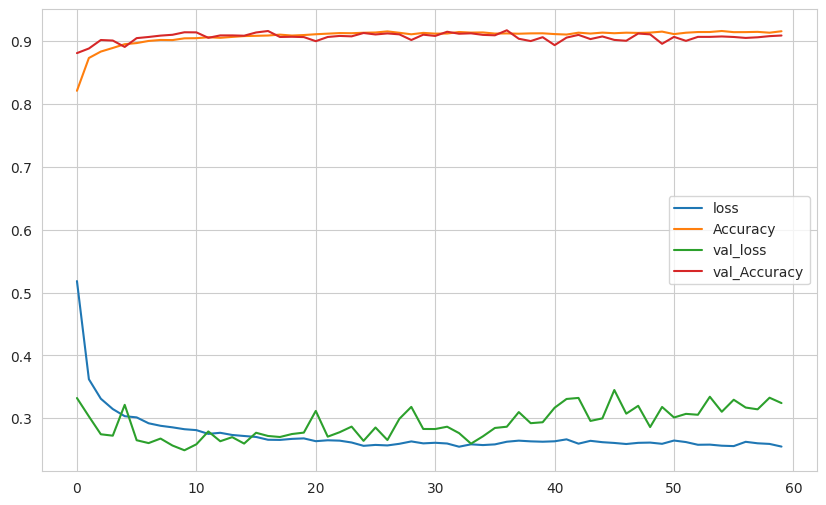

In [167]:
summary.plot();

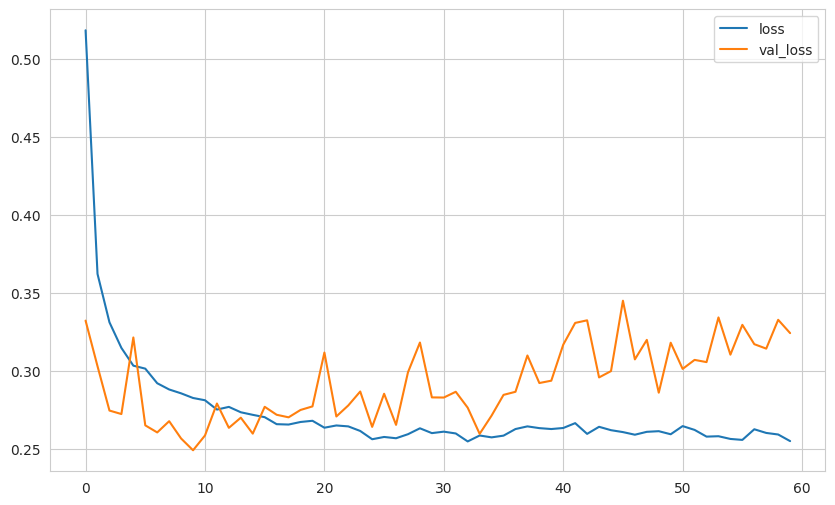

In [168]:
summary[["loss", "val_loss"]].plot();

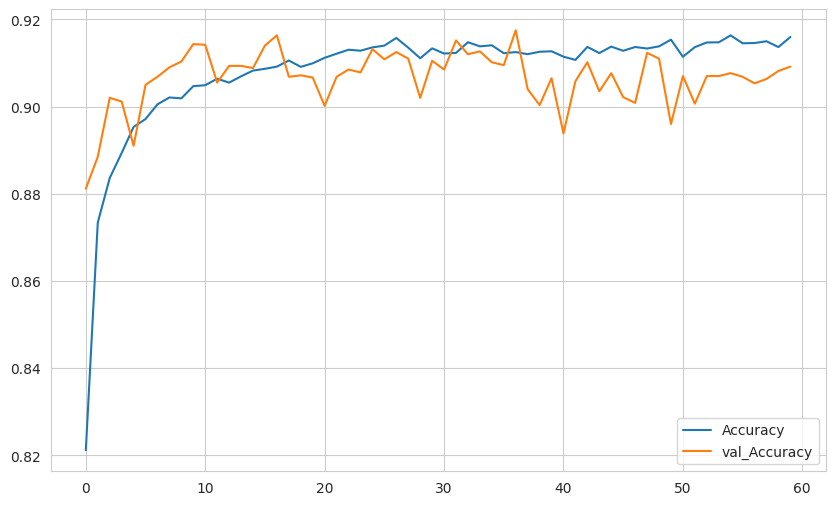

In [169]:
summary[["Accuracy", "val_Accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [170]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    multilabel_confusion_matrix,
)

In [171]:
model.evaluate(x_test, Y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3980 - Accuracy: 0.9014


[0.39795491099357605, 0.9014000296592712]

In [172]:
score = model.evaluate(x_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.39795491099357605
Test accuracy: 0.9014000296592712


In [173]:
pred_prob = model.predict(x_test)
pred_prob

313/313 [==============================] - 3s 8ms/step


array([[0.        , 0.        , 0.        , ..., 0.00000026, 0.        ,
        0.9999996 ],
       [0.        , 0.        , 0.99999994, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.99999994,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00001881, 0.00000268, 0.00001254, ..., 0.15401328, 0.00119587,
        0.0009029 ]], dtype=float32)

In [174]:
pred_prob.shape

(10000, 10)

In [175]:
pred_prob[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00000007, 0.        , 0.00000026, 0.        , 0.9999996 ],
      dtype=float32)

In [176]:
np.argmax(pred_prob[0])

9

In [177]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [178]:
y_pred.shape

(10000,)

In [179]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.85      0.81      0.83      1000
           3       0.87      0.93      0.90      1000
           4       0.81      0.86      0.83      1000
           5       0.99      0.97      0.98      1000
           6       0.76      0.69      0.72      1000
           7       0.95      0.98      0.96      1000
           8       0.99      0.98      0.98      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [180]:
print(confusion_matrix(y_test, y_pred))

[[873   1  11  42   4   1  66   0   2   0]
 [  3 968   2  18   3   0   5   0   1   0]
 [ 21   0 814   7  94   0  64   0   0   0]
 [ 16   4   6 932  16   0  26   0   0   0]
 [  0   0  66  30 856   0  47   0   1   0]
 [  0   0   0   1   0 968   0  21   0  10]
 [143   1  55  32  78   0 686   0   5   0]
 [  0   0   0   0   0   2   0 977   0  21]
 [  5   0   0   5   0   3   6   5 976   0]
 [  0   0   0   1   0   5   0  30   0 964]]


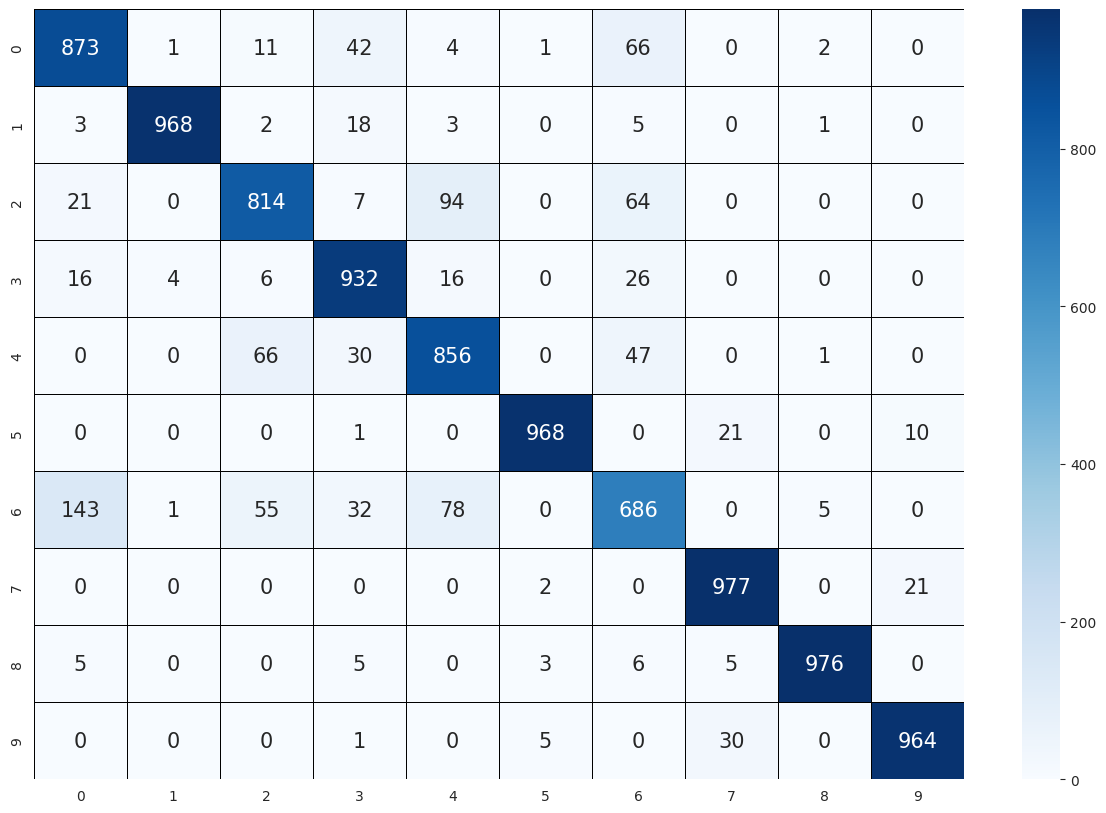

In [181]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

In [182]:
np.not_equal(y_test, y_pred)

array([False, False, False, ..., False, False, False])

In [183]:
# (y_test != y_pred).sum()
np.not_equal(y_test, y_pred).sum()

986

In [184]:
np.equal(y_test, y_pred).sum()

9014

## Prediction

In [211]:
my_number = x_test[111]

In [212]:
my_number.shape

(28, 28, 1)

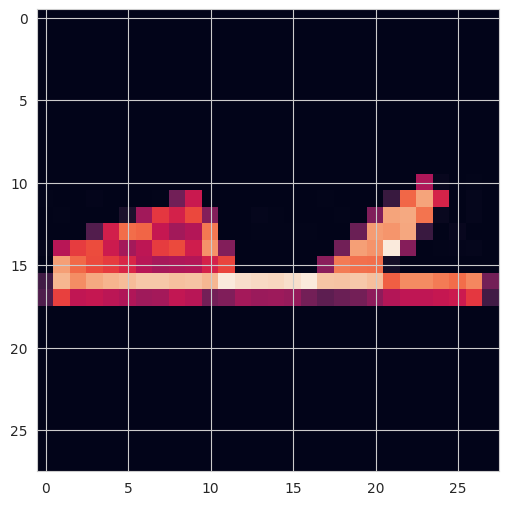

In [213]:
plt.imshow(my_number)
plt.show()

In [214]:
np.expand_dims(my_number, 0).shape

(1, 28, 28, 1)

In [215]:
pred_prob = model.predict(np.expand_dims(my_number, 0))
pred_prob

1/1 [==============================] - 0s 28ms/step


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

In [216]:
y_pred = np.argmax(pred_prob)
y_pred

5

In [223]:
model.save("cnn_classifictio-1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Using the saved model


In [222]:
model = tf.keras.models.load_model("cnn_classifictio-1.h5")




In [225]:
pred = model.predict(np.expand_dims(x_test[30], 0))

1/1 [==============================] - 0s 40ms/step


In [226]:
np.argmax(pred)

8

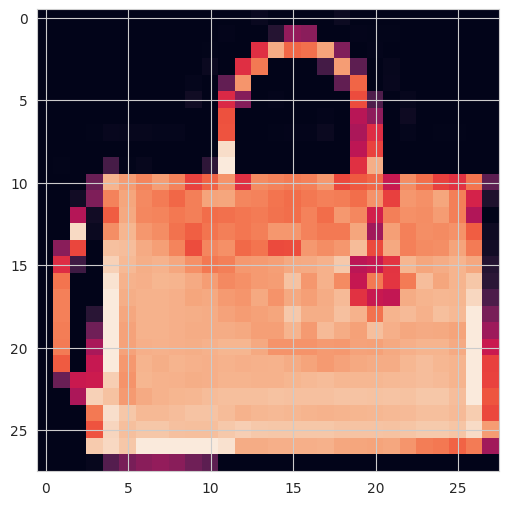

In [228]:
plt.imshow(x_test[30].reshape(28, 28))
plt.show()

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___